### INITIALIZE

Firstly we initialize the problem (as done before)

In [1]:
import numpy as np
from fireworks.ic import ic_two_body
import matplotlib.pyplot as plt
from fireworks.nbodylib.integrators import integrator_euler, integrator_leapfrog, integrator_rungekutta
from fireworks.nbodylib.dynamics import acceleration_direct_vectorized #, acceleration_direct, acceleration_pyfalcon, acceleration_jerk_direct
from fireworks.particles import Particles
from typing import Optional, Tuple, Callable, Union
from numpy.random import random, seed

#from mpl_toolkits.mplot3d import Axes3D

%matplotlib widget

In [2]:
from fireworks.nbodylib.timesteps import adaptive_timestep_simple, adaptive_timestep_r
from fireworks.nbodylib.integrators import integrator_tsunami

In [3]:
seed(42)

In [4]:
mass1 = 1.
mass2 = 2.
rp = 5. 
e_1 = 0.5               
e_2 = 0.9
e_3 = 0.99

part_1 = ic_two_body(mass1, mass2, rp, e_1)
part_2 = ic_two_body(mass1, mass2, rp, e_2)
part_3 = ic_two_body(mass1, mass2, rp, e_3)

M_tot_1 = np.sum(part_1.mass)
M_tot_2 = np.sum(part_2.mass)
M_tot_3 = np.sum(part_3.mass)

# e = 0.5 
a_1 = rp / (1 - e_1)
P_1 = np.sqrt((4 * np.pi**2. * a_1**3.)/(M_tot_1))
print('P_1 = ', P_1)

# e = 0.9
a_2 = rp / (1 - e_2)
P_2 = np.sqrt((4 * np.pi**2. * a_2**3.)/(M_tot_2))
print('P_2 = ', P_2)

# e = 0.99 
a_3 = rp / (1 - e_3)
P_3 = np.sqrt((4 * np.pi**2. * a_3**3.)/(M_tot_3))
print('P_3 = ', P_3)

P_1 =  114.71474419090953
P_2 =  1282.5498301618645
P_3 =  40557.78675973606


In [5]:
N = 2                       # number of particles
nsteps = 100000            #arbitrary number of timesteps
t = 0
tsimulation_1 = 10*P_1      # end of the simulation for e = 0.5
tsimulation_2 = 10*P_2      # end of the simulation for e = 0.9
tsimulation_3 = 10*P_3      # end of the simulation for e = 0.99
h_1 = (tsimulation_1-t)/nsteps
h_2 = (tsimulation_2-t)/nsteps
h_3 = (tsimulation_3-t)/nsteps
#h_1 = 1
#h_2 = 10
#h_3 = 100
print(h_1, h_2, h_3)    

0.011471474419090954 0.12825498301618646 4.055778675973606


### EULER

We follow the same procedure used before, but now in the definition we use the `adaptive_timestep_r` function from `fireworks.timesteps`.

In [6]:
part_1_euler_adaptive = part_1.copy()
part_2_euler_adaptive = part_2.copy()
part_3_euler_adaptive = part_3.copy()

In [7]:
r  = part_1_euler_adaptive.radius()
v  = part_1_euler_adaptive.vel_mod()
ts = r/v
ts =  np.nanmin(ts[np.nonzero(ts)])
print(r)
print(v)
print(ts)

[[0.]
 [5.]]
[[0.63245553]
 [0.31622777]]
15.811388300841896


In [8]:
def integration_euler_adaptive(part, h, tsimulation, t, N):
    path_1 = []
    path_2 = []
    time   = []
    time2  = []
    Etot_euler = []
    Ekin_euler = []
    Epot_euler = []

    while t < tsimulation:
        for j in range(1,N):
            result = integrator_euler(part, h, acceleration_direct_vectorized)
            updated_part, tstep, updated_acc, _, _ = result
            path_1.append(updated_part.pos[0])
            path_2.append(updated_part.pos[1])
            Etot_n, Ekin_n, Epot_n = updated_part.Etot()
            Etot_euler.append(Etot_n)
            Ekin_euler.append(Ekin_n)
            Epot_euler.append(Epot_n)
        
        ts_1, _, _ = adaptive_timestep_r(part)
        h = ts_1
        time.append(h)
        t += h
        time2.append(t)
    
        #print('h = ', h)
        #print('t = ', t)

    path_1 = np.array(path_1)
    path_2 = np.array(path_2)
    time   = np.array(time)
    time2  = np.array(time2)
    Etot_euler = np.array(Etot_euler)
    Ekin_euler = np.array(Ekin_euler)
    Etot_euler = np.array(Epot_euler)

    return path_1, path_2, Etot_euler, Ekin_euler, Epot_euler, time, time2


In [9]:
# e = 0.5
path1_euler_1_adaptive, path2_euler_1_adaptive, Etot_euler_1_adaptive, Ekin_euler_1_adaptive, Epot_euler_1_adaptive, time_euler_1_adaptive, time2_euler_1_adaptive = integration_euler_adaptive(part_1_euler_adaptive,
                                                                                                                                                                                                h_1, tsimulation_1, 
                                                                                                                                                                                                t, 
                                                                                                                                                                                                N)


# e = 0.9
path1_euler_2_adaptive, path2_euler_2_adaptive, Etot_euler_2_adaptive, Ekin_euler_2_adaptive, Epot_euler_2_adaptive, time_euler_2_adaptive, time2_euler_2_adaptive = integration_euler_adaptive(part_2_euler_adaptive,
                                                                                                                                                                                                h_2, tsimulation_2, 
                                                                                                                                                                                                t, 
                                                                                                                                                                                                N)


# e = 0.99
path1_euler_3_adaptive, path2_euler_3_adaptive, Etot_euler_3_adaptive, Ekin_euler_3_adaptive, Epot_euler_3_adaptive, time_euler_3_adaptive, time2_euler_3_adaptive = integration_euler_adaptive(part_3_euler_adaptive,
                                                                                                                                                                                                h_3, tsimulation_3, 
                                                                                                                                                                                                t, 
                                                                                                                                                                                                N)



/root/miniconda3/lib/python3.10/site-packages/fireworks-0.0.5-py3.10.egg/fireworks/nbodylib/dynamics.py:188: RuntimeWarning: invalid value encountered in divide


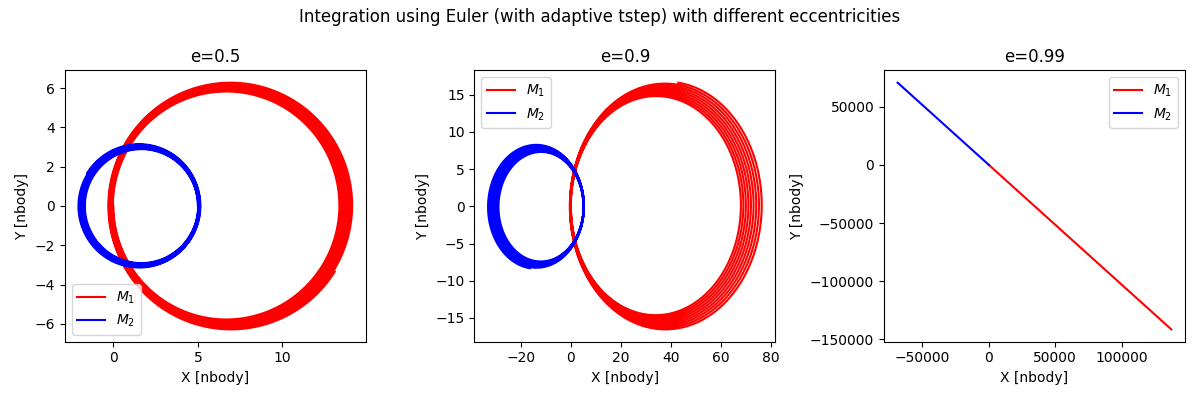

In [10]:
plt.figure(figsize=(12,4))

plt.suptitle('Integration using Euler (with adaptive tstep) with different eccentricities')

#e=0.5
plt.subplot(1,3,1)
plt.title('e=0.5')
plt.plot(path1_euler_1_adaptive[:,0], path1_euler_1_adaptive[:,1], label=f'$M_1$', color='red')
plt.plot(path2_euler_1_adaptive[:,0], path2_euler_1_adaptive[:,1], label=f'$M_2$', color='blue')
plt.xlabel('X [nbody]')
plt.ylabel('Y [nbody]')
plt.legend()

#e=0.9 
plt.subplot(1,3,2)
plt.title('e=0.9')
plt.plot(path1_euler_2_adaptive[:,0], path1_euler_2_adaptive[:,1], label=f'$M_1$', color='red')
plt.plot(path2_euler_2_adaptive[:,0], path2_euler_2_adaptive[:,1], label=f'$M_2$', color='blue')
plt.xlabel('X [nbody]')
plt.ylabel('Y [nbody]')
plt.legend()

#e=0.99
plt.subplot(1,3,3)
plt.title('e=0.99')
plt.plot(path1_euler_3_adaptive[:,0], path1_euler_3_adaptive[:,1], label=f'$M_1$', color='red')
plt.plot(path2_euler_3_adaptive[:,0], path2_euler_3_adaptive[:,1], label=f'$M_2$', color='blue')
plt.xlabel('X [nbody]')
plt.ylabel('Y [nbody]')
plt.legend()

plt.tight_layout()

The resolution is worse in the case without adaptive timestep for $e=0.5$, but better in the case of $e=0.9$. The $e=0.99$ case is still unusuable.
The running time is way lower in this case with the adaptive timestep.

### LEAPFROG

We follow the same procedure used before, but now in the definition we use the `adaptive_timestep_r` function from `fireworks.timesteps`.

In [11]:
part_1_leapfrog_adaptive = part_1.copy()
part_2_leapfrog_adaptive = part_2.copy()
part_3_leapfrog_adaptive = part_3.copy()

In [12]:
def integration_leapfrog_adaptive(part, h, tsimulation, t, N):
    path_1 = []
    path_2 = []
    time   = []
    time2  = []
    Etot_leapfrog = []
    Ekin_leapfrog = []
    Epot_leapfrog = []

    while t < tsimulation:
        for j in range(1,N):
            result = integrator_leapfrog(part, h, acceleration_direct_vectorized)
            updated_part, tstep, updated_acc, _, _ = result
            path_1.append(updated_part.pos[0])
            path_2.append(updated_part.pos[1])
            Etot_n, Ekin_n, Epot_n = updated_part.Etot()
            Etot_leapfrog.append(Etot_n)
            Ekin_leapfrog.append(Ekin_n)
            Epot_leapfrog.append(Epot_n)
        
        ts_1, _, _ = adaptive_timestep_r(part)
        h = ts_1
        time.append(h)
        t += h
        time2.append(t)
    
        #print('h = ', h)
        #print('t = ', t)

    path_1 = np.array(path_1)
    path_2 = np.array(path_2)
    time   = np.array(time)
    time2  = np.array(time2)
    Etot_leapfrog = np.array(Etot_leapfrog)
    Ekin_leapfrog = np.array(Ekin_leapfrog)
    Etot_leapfrog = np.array(Epot_leapfrog)

    return path_1, path_2, Etot_leapfrog, Ekin_leapfrog, Epot_leapfrog, time, time2


In [13]:
# e = 0.5
path1_leapfrog_1_adaptive, path2_leapfrog_1_adaptive, Etot_leapfrog_1_adaptive, Ekin_leapfrog_1_adaptive, Epot_leapfrog_1_adaptive, time_leapfrog_1_adaptive, time2_leapfrog_1_adaptive = integration_leapfrog_adaptive(part_1_leapfrog_adaptive,
                                                                                                                                                                                                                        h_1, tsimulation_1, t, N)

# e = 0.9
path1_leapfrog_2_adaptive, path2_leapfrog_2_adaptive, Etot_leapfrog_2_adaptive, Ekin_leapfrog_2_adaptive, Epot_leapfrog_2_adaptive, time_leapfrog_2_adaptive, time2_leapfrog_2_adaptive = integration_leapfrog_adaptive(part_2_leapfrog_adaptive,
                                                                                                                                                                                                                        h_2, tsimulation_2, t, N)


# e = 0.99
path1_leapfrog_3_adaptive, path2_leapfrog_3_adaptive, Etot_leapfrog_3_adaptive, Ekin_leapfrog_3_adaptive, Epot_leapfrog_3_adaptive, time_leapfrog_3_adaptive, time2_leapfrog_3_adaptive = integration_leapfrog_adaptive(part_3_leapfrog_adaptive,
                                                                                                                                                                                                                        h_3, tsimulation_3, t, N)

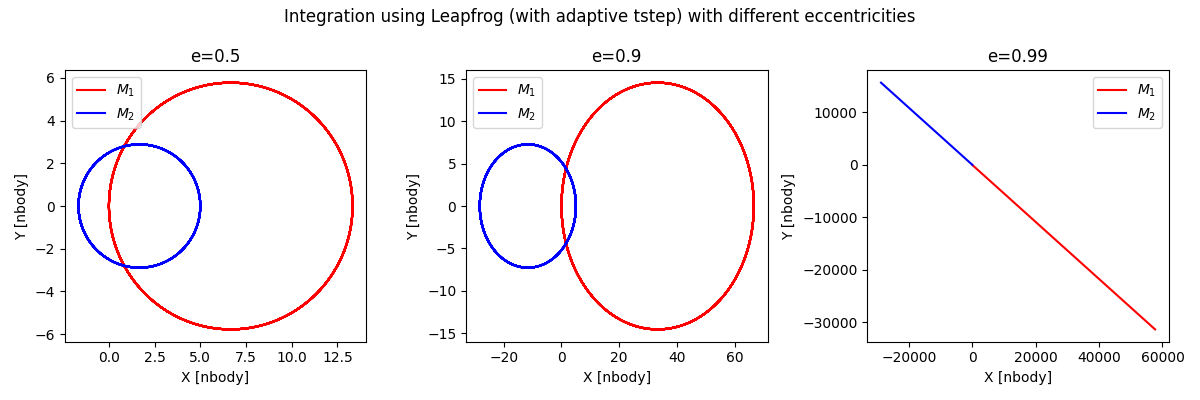

In [14]:
plt.figure(figsize=(12,4))

plt.suptitle('Integration using Leapfrog (with adaptive tstep) with different eccentricities')

#e=0.5
plt.subplot(1,3,1)
plt.title('e=0.5')
plt.plot(path1_leapfrog_1_adaptive[:,0], path1_leapfrog_1_adaptive[:,1], label=f'$M_1$', color='red')
plt.plot(path2_leapfrog_1_adaptive[:,0], path2_leapfrog_1_adaptive[:,1], label=f'$M_2$', color='blue')
plt.xlabel('X [nbody]')
plt.ylabel('Y [nbody]')
plt.legend()

#e=0.9 
plt.subplot(1,3,2)
plt.title('e=0.9')
plt.plot(path1_leapfrog_2_adaptive[:,0], path1_leapfrog_2_adaptive[:,1], label=f'$M_1$', color='red')
plt.plot(path2_leapfrog_2_adaptive[:,0], path2_leapfrog_2_adaptive[:,1], label=f'$M_2$', color='blue')
plt.xlabel('X [nbody]')
plt.ylabel('Y [nbody]')
plt.legend()

#e=0.99
plt.subplot(1,3,3)
plt.title('e=0.99')
plt.plot(path1_leapfrog_3_adaptive[:,0], path1_leapfrog_3_adaptive[:,1], label=f'$M_1$', color='red')
plt.plot(path2_leapfrog_3_adaptive[:,0], path2_leapfrog_3_adaptive[:,1], label=f'$M_2$', color='blue')
plt.xlabel('X [nbody]')
plt.ylabel('Y [nbody]')
plt.legend()

plt.tight_layout()

The resolution is similar to the case without adaptive timestep, and it represents the physical situation for the first two values of the eccentricity, but the running time is way lower in this case. The case with $e=0.99$ does not represent the physical situation in the case of the adaptive timestep, as happens in the case without adaptive timestep for $n_{steps}=100000.

### RUNGE-KUTTA

We follow the same procedure used before, but now in the definition we use the `adaptive_timestep_r` function from `fireworks.timesteps`.

In [15]:
part_1_rungekutta_adaptive = part_1.copy()
part_2_rungekutta_adaptive = part_2.copy()
part_3_rungekutta_adaptive = part_3.copy()

In [16]:
def integration_rungekutta_adaptive(part, h, tsimulation, t, N):
    path_1 = []
    path_2 = []
    time   = []
    time2  = []
    Etot_rungekutta = []
    Ekin_rungekutta = []
    Epot_rungekutta = []

    while t < tsimulation:
        for j in range(1,N):
            result = integrator_rungekutta(part, h, acceleration_direct_vectorized)
            updated_part, tstep, updated_acc, _, _ = result
            path_1.append(updated_part.pos[0])
            path_2.append(updated_part.pos[1])
            Etot_n, Ekin_n, Epot_n = updated_part.Etot()
            Etot_rungekutta.append(Etot_n)
            Ekin_rungekutta.append(Ekin_n)
            Epot_rungekutta.append(Epot_n)
        
        ts_1, _, _ = adaptive_timestep_r(part)
        h = ts_1
        time.append(h)
        t += h
        time2.append(t)
    
        #print('h = ', h)
        #print('t = ', t)

    path_1 = np.array(path_1)
    path_2 = np.array(path_2)
    time   = np.array(time)
    time2  = np.array(time2)
    Etot_rungekutta = np.array(Etot_rungekutta)
    Ekin_rungekutta = np.array(Ekin_rungekutta)
    Etot_rungekutta = np.array(Epot_rungekutta)

    return path_1, path_2, Etot_rungekutta, Ekin_rungekutta, Epot_rungekutta, time, time2


In [17]:
# e = 0.5
path1_rungekutta_1_adaptive, path2_rungekutta_1_adaptive, Etot_rungekutta_1_adaptive, Ekin_rungekutta_1_adaptive, Epot_rungekutta_1_adaptive, time_rungekutta_1_adaptive, time2_rungekutta_1_adaptive = integration_rungekutta_adaptive(part_1_rungekutta_adaptive,
                                                                                                                                                                                                                                h_1, tsimulation_1, t, N)

# e = 0.9
path1_rungekutta_2_adaptive, path2_rungekutta_2_adaptive, Etot_rungekutta_2_adaptive, Ekin_rungekutta_2_adaptive, Epot_rungekutta_2_adaptive, time_rungekutta_2_adaptive, time2_rungekutta_2_adaptive = integration_rungekutta_adaptive(part_2_rungekutta_adaptive,
                                                                                                                                                                                                                                h_2, tsimulation_2, t, N)

# e = 0.99
path1_rungekutta_3_adaptive, path2_rungekutta_3_adaptive, Etot_rungekutta_3_adaptive, Ekin_rungekutta_3_adaptive, Epot_rungekutta_3_adaptive, time_rungekutta_3_adaptive, time2_rungekutta_3_adaptive = integration_rungekutta_adaptive(part_3_rungekutta_adaptive,
                                                                                                                                                                                                                                h_3, tsimulation_3, t, N)

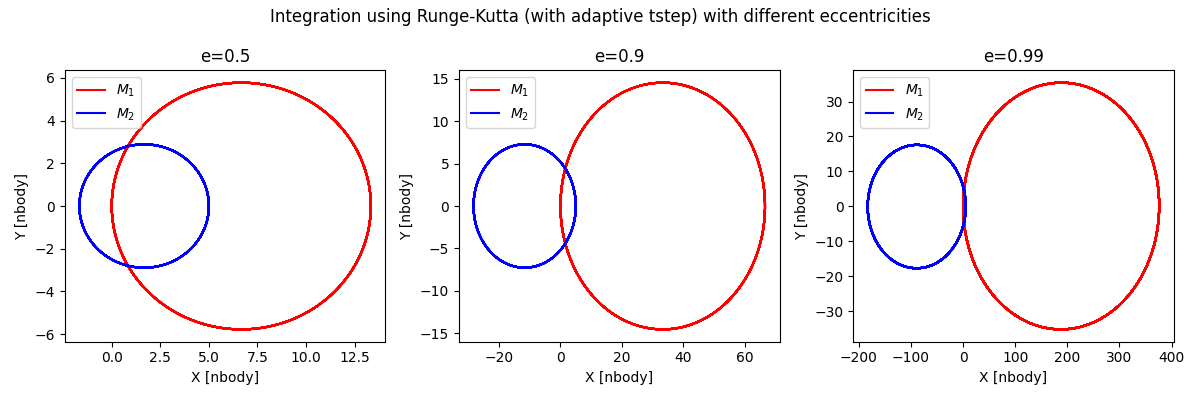

In [18]:
plt.figure(figsize=(12,4))

plt.suptitle('Integration using Runge-Kutta (with adaptive tstep) with different eccentricities')

#e=0.5
plt.subplot(1,3,1)
plt.title('e=0.5')
plt.plot(path1_rungekutta_1_adaptive[:,0], path1_rungekutta_1_adaptive[:,1], label=f'$M_1$', color='red')
plt.plot(path2_rungekutta_1_adaptive[:,0], path2_rungekutta_1_adaptive[:,1], label=f'$M_2$', color='blue')
plt.xlabel('X [nbody]')
plt.ylabel('Y [nbody]')
plt.legend()

#e=0.9 
plt.subplot(1,3,2)
plt.title('e=0.9')
plt.plot(path1_rungekutta_2_adaptive[:,0], path1_rungekutta_2_adaptive[:,1], label=f'$M_1$', color='red')
plt.plot(path2_rungekutta_2_adaptive[:,0], path2_rungekutta_2_adaptive[:,1], label=f'$M_2$', color='blue')
plt.xlabel('X [nbody]')
plt.ylabel('Y [nbody]')
plt.legend()

#e=0.99
plt.subplot(1,3,3)
plt.title('e=0.99')
plt.plot(path1_rungekutta_3_adaptive[:,0], path1_rungekutta_3_adaptive[:,1], label=f'$M_1$', color='red')
plt.plot(path2_rungekutta_3_adaptive[:,0], path2_rungekutta_3_adaptive[:,1], label=f'$M_2$', color='blue')
plt.xlabel('X [nbody]')
plt.ylabel('Y [nbody]')
plt.legend()

plt.tight_layout()

As expected, the resolution is similar to the case without adaptive timestep, but the running time is way lower.

### ENERGIES 

Let's now compare the energies

In [19]:
def total_energy_error(Etot):
    energy_error = np.zeros(len(Etot))

    for i in range(len(energy_error)):
        energy_error[i] = np.abs((Etot[i] - Etot[0])/Etot[0])


    return energy_error

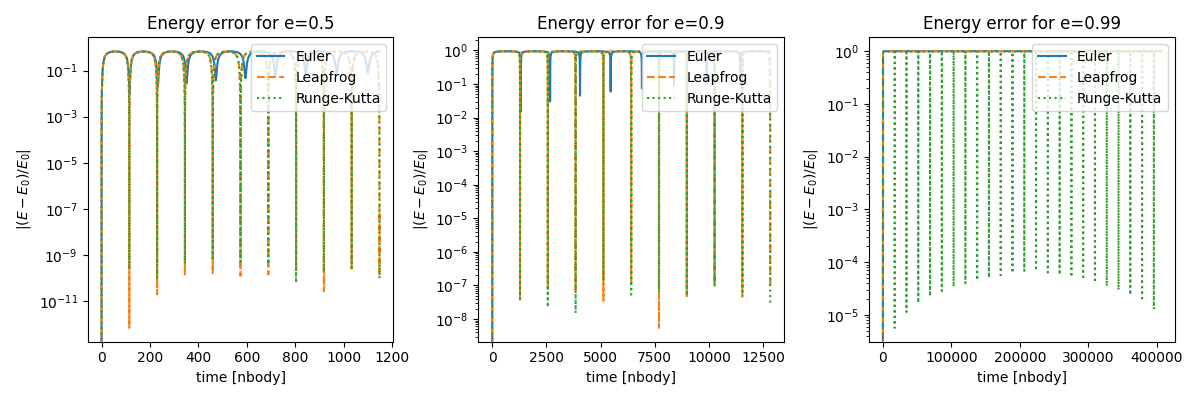

In [20]:
# TOTAL ENERGY ERROR EULER
energy_error_euler_1 = total_energy_error(Etot_euler_1_adaptive)
energy_error_euler_2 = total_energy_error(Etot_euler_2_adaptive)
energy_error_euler_3 = total_energy_error(Etot_euler_3_adaptive)

# TOTAL ENERGY ERROR LEAPFROG
energy_error_leapfrog_1 = total_energy_error(Etot_leapfrog_1_adaptive)
energy_error_leapfrog_2 = total_energy_error(Etot_leapfrog_2_adaptive)
energy_error_leapfrog_3 = total_energy_error(Etot_leapfrog_3_adaptive)

# TOTAL ENERGY ERROR RUNGE-KUTTA
energy_error_rungekutta_1 = total_energy_error(Etot_rungekutta_1_adaptive)
energy_error_rungekutta_2 = total_energy_error(Etot_rungekutta_2_adaptive)
energy_error_rungekutta_3 = total_energy_error(Etot_rungekutta_3_adaptive)

# TOTAL ENERGY ERROR ALL TOGETHER
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.plot(time2_euler_1_adaptive, energy_error_euler_1, label='Euler')
plt.plot(time2_leapfrog_1_adaptive, energy_error_leapfrog_1, label='Leapfrog', linestyle='dashed')
plt.plot(time2_rungekutta_1_adaptive, energy_error_rungekutta_1, label='Runge-Kutta', linestyle='dotted')
plt.yscale('log')
plt.xlabel('time [nbody]')
plt.ylabel(f'$|(E-E_0)/E_0|$')
plt.title('Energy error for e=0.5')
plt.legend(loc='upper right')

plt.subplot(1,3,2)
plt.plot(time2_euler_2_adaptive, energy_error_euler_2, label='Euler')
plt.plot(time2_leapfrog_2_adaptive, energy_error_leapfrog_2, label='Leapfrog', linestyle='dashed')
plt.plot(time2_rungekutta_2_adaptive, energy_error_rungekutta_2, label='Runge-Kutta', linestyle='dotted')
plt.yscale('log')
plt.xlabel('time [nbody]')
plt.ylabel(f'$|(E-E_0)/E_0|$')
plt.title('Energy error for e=0.9')
plt.legend(loc='upper right')

plt.subplot(1,3,3)
plt.plot(time2_euler_3_adaptive, energy_error_euler_3, label='Euler')
plt.plot(time2_leapfrog_3_adaptive, energy_error_leapfrog_3, label='Leapfrog', linestyle='dashed')
plt.plot(time2_rungekutta_3_adaptive, energy_error_rungekutta_3, label='Runge-Kutta', linestyle='dotted')
plt.yscale('log')
plt.xlabel('time [nbody]')
plt.ylabel(f'$|(E-E_0)/E_0|$')
plt.title('Energy error for e=0.99')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

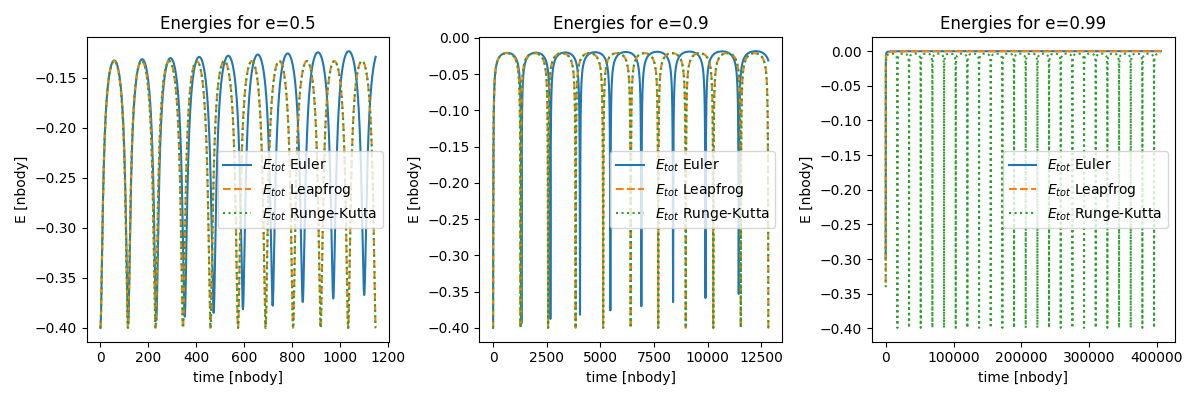

In [21]:
plt.figure(figsize=(12,4))

#e=0.5
plt.subplot(1,3,1)
plt.plot(time2_euler_1_adaptive, Etot_euler_1_adaptive, label='$E_{tot}$ Euler')
plt.plot(time2_leapfrog_1_adaptive, Etot_leapfrog_1_adaptive, label='$E_{tot}$ Leapfrog', linestyle='dashed')
plt.plot(time2_rungekutta_1_adaptive, Etot_rungekutta_1_adaptive, label='$E_{tot}$ Runge-Kutta', linestyle='dotted')
plt.title('Energies for e=0.5')
plt.xlabel('time [nbody]')
plt.ylabel('E [nbody]')
plt.legend()

#e=0.9
plt.subplot(1,3,2)
plt.plot(time2_euler_2_adaptive, Etot_euler_2_adaptive, label='$E_{tot}$ Euler')
plt.plot(time2_leapfrog_2_adaptive, Etot_leapfrog_2_adaptive, label='$E_{tot}$ Leapfrog', linestyle='dashed')
plt.plot(time2_rungekutta_2_adaptive, Etot_rungekutta_2_adaptive, label='$E_{tot}$ Runge-Kutta', linestyle='dotted')
plt.title('Energies for e=0.9')
plt.xlabel('time [nbody]')
plt.ylabel('E [nbody]')
plt.legend()

#e=0.99
plt.subplot(1,3,3)
plt.plot(time2_euler_3_adaptive, Etot_euler_3_adaptive, label='$E_{tot}$ Euler')
plt.plot(time2_leapfrog_3_adaptive, Etot_leapfrog_3_adaptive, label='$E_{tot}$ Leapfrog', linestyle='dashed')
plt.plot(time2_rungekutta_3_adaptive, Etot_rungekutta_3_adaptive, label='$E_{tot}$ Runge-Kutta', linestyle='dotted')
plt.title('Energies for e=0.99')
plt.xlabel('time [nbody]')
plt.ylabel('E [nbody]')
plt.legend()

plt.tight_layout()

### TSUNAMI INTEGRATOR

Let us now use the tsunami integrator. We sliced $t_{simulation}$ in 100000 equally spaced parts.

In [22]:
part_1_tsunami = part_1.copy()
part_2_tsunami = part_2.copy()
part_3_tsunami = part_3.copy()

In [23]:
def integration_with_tsunami(part, tsimulation):
    tstart=0
    tintermediate = np.linspace(tstart, tsimulation, 100000)
    tcurrent=0
    pos1_tsu = []
    pos2_tsu = []
    Epot_tsu = []
    Ekin_tsu = []
    Etot_tsu = []
    t_tsunami = []

    for t in tintermediate:
        tstep=t-tcurrent
        if tstep <=0: continue 
        part_tsunami, efftime,_,_,_=integrator_tsunami(part, tstep)

        #I append the positions
        pos1_tsu.append(part_tsunami.pos[0].copy())
        pos2_tsu.append(part_tsunami.pos[1].copy())

        #I append the energies
        Etot_n, Ekin_n, Epot_n =  part_tsunami.Etot()
        Etot_tsu.append(Etot_n)
        Ekin_tsu.append(Ekin_n)
        Epot_tsu.append(Epot_n)

        #I append the times
        t_tsunami.append(tcurrent)

        tcurrent=tcurrent+efftime

    #I transform everything in numpy arrays
    pos1_tsu    = np.array(pos1_tsu)
    pos2_tsu    = np.array(pos2_tsu)
    Epot_tsu    = np.array(Epot_tsu)
    Ekin_tsu    = np.array(Ekin_tsu)
    Etot_tsu    = np.array(Etot_tsu)
    t_tsunami   = np.array(t_tsunami)


    return pos1_tsu, pos2_tsu, Epot_tsu, Ekin_tsu, Etot_tsu, t_tsunami



In [24]:
#e=0.5
pos1_tsu_1, pos2_tsu_1, Epot_tsu_1, Ekin_tsu_1, Etot_tsu_1, t_tsunami_1 = integration_with_tsunami(part_1_tsunami, tsimulation_1)

#e=0.9
pos1_tsu_2, pos2_tsu_2, Epot_tsu_2, Ekin_tsu_2, Etot_tsu_2, t_tsunami_2 = integration_with_tsunami(part_2_tsunami, tsimulation_2)

#e=0.99
pos1_tsu_3, pos2_tsu_3, Epot_tsu_3, Ekin_tsu_3, Etot_tsu_3, t_tsunami_3 = integration_with_tsunami(part_3_tsunami, tsimulation_3)

The running time is a few seconds: minuscule!

Let us now do some graphs.

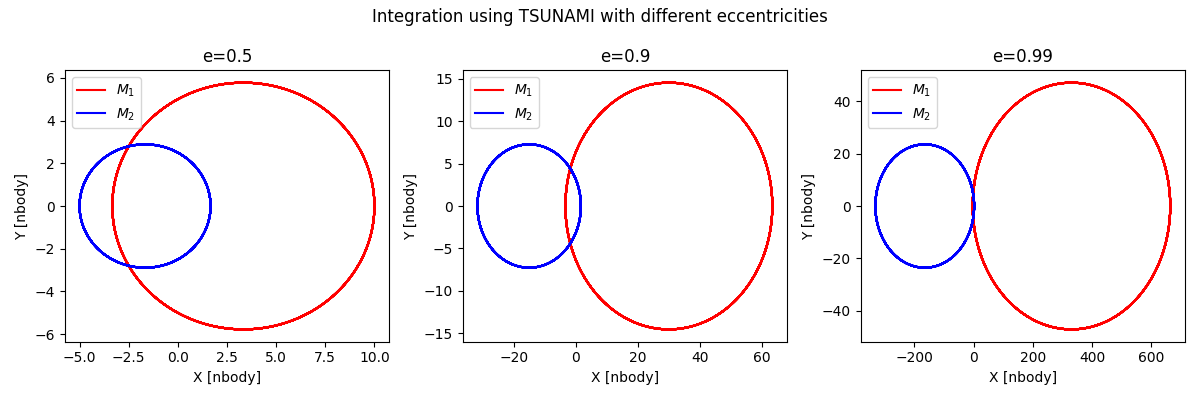

In [25]:
plt.figure(figsize=(12,4))

plt.suptitle('Integration using TSUNAMI with different eccentricities')

#e=0.5
plt.subplot(1,3,1)
plt.title('e=0.5')
plt.plot(pos1_tsu_1[:,0], pos1_tsu_1[:,1], label=f'$M_1$', color='red')
plt.plot(pos2_tsu_1[:,0], pos2_tsu_1[:,1], label=f'$M_2$', color='blue')
plt.xlabel('X [nbody]')
plt.ylabel('Y [nbody]')
plt.legend()

#e=0.9
plt.subplot(1,3,2)
plt.title('e=0.9')
plt.plot(pos1_tsu_2[:,0], pos1_tsu_2[:,1], label=f'$M_1$', color='red')
plt.plot(pos2_tsu_2[:,0], pos2_tsu_2[:,1], label=f'$M_2$', color='blue')
plt.xlabel('X [nbody]')
plt.ylabel('Y [nbody]')
plt.legend()

#e=0.99
plt.subplot(1,3,3)
plt.title('e=0.99')
plt.plot(pos1_tsu_3[:,0], pos1_tsu_3[:,1], label=f'$M_1$', color='red')
plt.plot(pos2_tsu_3[:,0], pos2_tsu_3[:,1], label=f'$M_2$', color='blue')
plt.xlabel('X [nbody]')
plt.ylabel('Y [nbody]')
plt.legend()

plt.tight_layout()

The resolution is comparable (even better) than the one achieved with the Runge-Kutta method.

Let us now plot the energy, as done for the others integration methods.

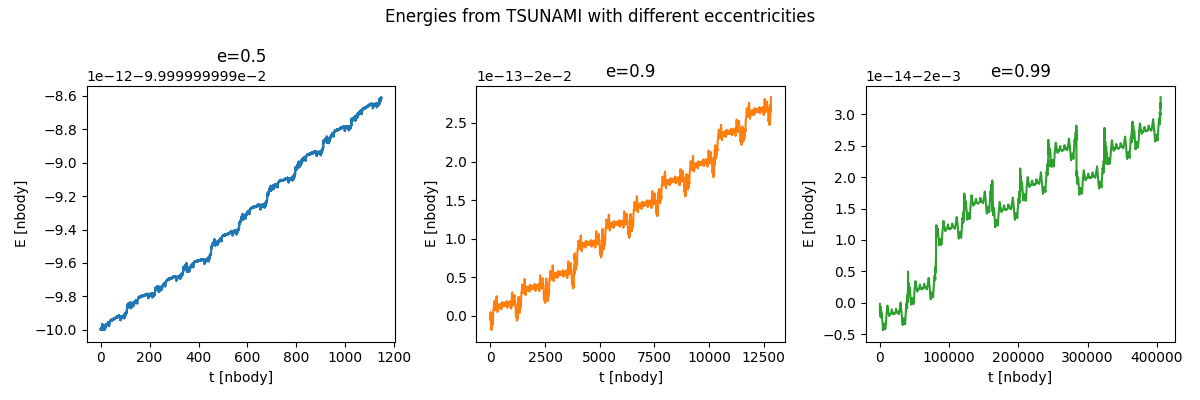

In [26]:
plt.figure(figsize=(12,4))

plt.suptitle('Energies from TSUNAMI with different eccentricities')

#e=0.5
plt.subplot(1,3,1)
plt.title('e=0.5')
plt.plot(t_tsunami_1, Etot_tsu_1, color='C0')
plt.xlabel('t [nbody]')
plt.ylabel('E [nbody]')

#e=0.9
plt.subplot(1,3,2)
plt.title('e=0.9')
plt.plot(t_tsunami_2, Etot_tsu_2, color='C1')
plt.xlabel('t [nbody]')
plt.ylabel('E [nbody]')

#e=0.99
plt.subplot(1,3,3)
plt.title('e=0.99')
plt.plot(t_tsunami_3, Etot_tsu_3, color='C2')
plt.xlabel('t [nbody]')
plt.ylabel('E [nbody]')

plt.tight_layout()